In [343]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [344]:
orders = pd.read_excel('dataset.xlsx')
orders

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Channel,Postal Code,Product ID,Sales,Quantity,Unit Cost
0,646,CA-2017-126221,2017-12-30,2018-01-05,Standard Class,CC-12430,Home Office,47201,OFF-AP-10002457,209.300,2,76.3945
1,907,CA-2017-143259,2017-12-30,2018-01-03,Standard Class,PO-18865,Consumer,10009,FUR-BO-10003441,323.136,4,77.7546
2,908,CA-2017-143259,2017-12-30,2018-01-03,Standard Class,PO-18865,Consumer,10009,TEC-PH-10004774,90.930,7,12.6003
3,909,CA-2017-143259,2017-12-30,2018-01-03,Standard Class,PO-18865,Consumer,10009,OFF-BI-10003684,52.776,3,10.9950
4,1297,CA-2017-115427,2017-12-30,2018-01-03,Standard Class,EB-13975,Corporate,94533,OFF-BI-10002103,13.904,2,4.6926
...,...,...,...,...,...,...,...,...,...,...,...,...
9989,1760,CA-2014-141817,2014-01-05,2014-01-12,Standard Class,MB-18085,Consumer,19143,OFF-AR-10003478,19.536,3,4.8840
9990,740,CA-2014-112326,2014-01-04,2014-01-08,Standard Class,PO-19195,Home Office,60540,OFF-LA-10003223,11.784,3,2.5041
9991,741,CA-2014-112326,2014-01-04,2014-01-08,Standard Class,PO-19195,Home Office,60540,OFF-ST-10002743,272.736,3,112.5036
9992,742,CA-2014-112326,2014-01-04,2014-01-08,Standard Class,PO-19195,Home Office,60540,OFF-BI-10004094,3.540,2,4.5135


In [345]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Row ID       9994 non-null   int64         
 1   Order ID     9994 non-null   object        
 2   Order Date   9994 non-null   datetime64[ns]
 3   Ship Date    9994 non-null   datetime64[ns]
 4   Ship Mode    9994 non-null   object        
 5   Customer ID  9994 non-null   object        
 6   Channel      9994 non-null   object        
 7   Postal Code  9994 non-null   int64         
 8   Product ID   9994 non-null   object        
 9   Sales        9994 non-null   float64       
 10  Quantity     9994 non-null   int64         
 11  Unit Cost    9994 non-null   float64       
dtypes: datetime64[ns](2), float64(2), int64(3), object(5)
memory usage: 937.1+ KB


In [346]:
product = pd.read_excel('dataset.xlsx', 'Product')
product.info()
location = pd.read_excel('dataset.xlsx', 'Location')
location.info()
customer = pd.read_excel('dataset.xlsx', 'Customer')
customer.info()
returned = pd.read_excel('dataset.xlsx', 'Return')
returned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1894 entries, 0 to 1893
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Row ID        1894 non-null   int64 
 1   Product ID    1894 non-null   object
 2   Category      1894 non-null   object
 3   Sub-Category  1894 non-null   object
 4   Product Name  1894 non-null   object
dtypes: int64(1), object(4)
memory usage: 74.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 632 entries, 0 to 631
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Row ID       632 non-null    int64 
 1   Postal Code  632 non-null    int64 
 2   Country      632 non-null    object
 3   City         632 non-null    object
 4   State        632 non-null    object
 5   Region       632 non-null    object
dtypes: int64(2), object(4)
memory usage: 29.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 793 entries, 0 t

In [347]:
data = orders.groupby(['Customer ID'])
data = pd.merge(orders, returned, on='Order ID', how='left')
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Channel,Postal Code,Product ID,Sales,Quantity,Unit Cost,Returned
0,646,CA-2017-126221,2017-12-30,2018-01-05,Standard Class,CC-12430,Home Office,47201,OFF-AP-10002457,209.300,2,76.3945,NaN
1,907,CA-2017-143259,2017-12-30,2018-01-03,Standard Class,PO-18865,Consumer,10009,FUR-BO-10003441,323.136,4,77.7546,NaN
2,908,CA-2017-143259,2017-12-30,2018-01-03,Standard Class,PO-18865,Consumer,10009,TEC-PH-10004774,90.930,7,12.6003,NaN
3,909,CA-2017-143259,2017-12-30,2018-01-03,Standard Class,PO-18865,Consumer,10009,OFF-BI-10003684,52.776,3,10.9950,NaN
4,1297,CA-2017-115427,2017-12-30,2018-01-03,Standard Class,EB-13975,Corporate,94533,OFF-BI-10002103,13.904,2,4.6926,Yes


In [348]:
data = data[data['Returned'].isnull()]
data.head()                                             

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Channel,Postal Code,Product ID,Sales,Quantity,Unit Cost,Returned
0,646,CA-2017-126221,2017-12-30,2018-01-05,Standard Class,CC-12430,Home Office,47201,OFF-AP-10002457,209.300,2,76.3945,NaN
1,907,CA-2017-143259,2017-12-30,2018-01-03,Standard Class,PO-18865,Consumer,10009,FUR-BO-10003441,323.136,4,77.7546,NaN
2,908,CA-2017-143259,2017-12-30,2018-01-03,Standard Class,PO-18865,Consumer,10009,TEC-PH-10004774,90.930,7,12.6003,NaN
3,909,CA-2017-143259,2017-12-30,2018-01-03,Standard Class,PO-18865,Consumer,10009,OFF-BI-10003684,52.776,3,10.9950,NaN
6,5092,CA-2017-156720,2017-12-30,2018-01-03,Standard Class,JM-15580,Consumer,80538,OFF-FA-10003472,3.024,3,1.2096,NaN


In [349]:
data['Order Date'].max()
now = dt.date(2017,12,31)
data['Date'] = pd.DatetimeIndex(data['Order Date']).date
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Channel,Postal Code,Product ID,Sales,Quantity,Unit Cost,Returned,Date
0,646,CA-2017-126221,2017-12-30,2018-01-05,Standard Class,CC-12430,Home Office,47201,OFF-AP-10002457,209.300,2,76.3945,NaN,2017-12-30
1,907,CA-2017-143259,2017-12-30,2018-01-03,Standard Class,PO-18865,Consumer,10009,FUR-BO-10003441,323.136,4,77.7546,NaN,2017-12-30
2,908,CA-2017-143259,2017-12-30,2018-01-03,Standard Class,PO-18865,Consumer,10009,TEC-PH-10004774,90.930,7,12.6003,NaN,2017-12-30
3,909,CA-2017-143259,2017-12-30,2018-01-03,Standard Class,PO-18865,Consumer,10009,OFF-BI-10003684,52.776,3,10.9950,NaN,2017-12-30
6,5092,CA-2017-156720,2017-12-30,2018-01-03,Standard Class,JM-15580,Consumer,80538,OFF-FA-10003472,3.024,3,1.2096,NaN,2017-12-30


In [350]:
recency = data.groupby(['Customer ID'], as_index=False)['Date'].max()
recency.columns = ['Customer ID','LastPurchaseDate']
recency.head()

,Customer ID,LastPurchaseDate
0,AA-10315,2017-06-29
1,AA-10375,2017-12-11
2,AA-10480,2017-04-15
3,AA-10645,2016-09-04
4,AB-10015,2016-11-10


In [351]:
recency['Recency'] = recency.LastPurchaseDate.apply(lambda x : (now - x).days)
recency.head()

,Customer ID,LastPurchaseDate,Recency
0,AA-10315,2017-06-29,185
1,AA-10375,2017-12-11,20
2,AA-10480,2017-04-15,260
3,AA-10645,2016-09-04,483
4,AB-10015,2016-11-10,416


In [352]:
frequency = data.copy()
frequency.drop_duplicates(subset=['Customer ID','Order Date'], keep="first", inplace=True) 
frequency = frequency.groupby('Customer ID',as_index=False)['Order Date'].count()
frequency.columns = ['Customer ID','Frequency']
frequency.head()

,Customer ID,Frequency
0,AA-10315,5
1,AA-10375,9
2,AA-10480,4
3,AA-10645,5
4,AB-10015,3


In [353]:
monetary = data.groupby(['Customer ID'],as_index=False)['Sales'].sum()
monetary.columns = ['Customer ID', 'Monetary']
monetary.head()

,Customer ID,Monetary
0,AA-10315,5563.560
1,AA-10375,1056.390
2,AA-10480,1790.512
3,AA-10645,5073.975
4,AB-10015,886.156


In [354]:
rf = recency.merge(frequency, on='Customer ID',how = 'left')
rfm = rf.merge(monetary, on='Customer ID',how = 'left')
rfm.set_index('Customer ID',inplace=True)
rfm.head()

,LastPurchaseDate,Recency,Frequency,Monetary
Customer ID,,,,
AA-10315,2017-06-29,185,5,5563.560
AA-10375,2017-12-11,20,9,1056.390
AA-10480,2017-04-15,260,4,1790.512
AA-10645,2016-09-04,483,5,5073.975
AB-10015,2016-11-10,416,3,886.156


In [355]:
r = range(5, 0, -1)
f = range(1, 6)
m = range(1, 6)

r_groups = pd.qcut(rfm['Recency'], q=5, labels=r)
f_groups = pd.qcut(rfm['Frequency'], q=5, labels=f)
m_groups = pd.qcut(rfm['Monetary'], q=5, labels=m)

rfm_score = rfm.assign(R=r_groups.values, F=f_groups.values, M=m_groups.values)

rfm_score.head()

,LastPurchaseDate,Recency,Frequency,Monetary,R,F,M
Customer ID,,,,,,,
AA-10315,2017-06-29,185,5,5563.560,2,2,5
AA-10375,2017-12-11,20,9,1056.390,5,5,2
AA-10480,2017-04-15,260,4,1790.512,2,1,3
AA-10645,2016-09-04,483,5,5073.975,1,2,5
AB-10015,2016-11-10,416,3,886.156,1,1,2


In [356]:
rfm_score['RFM_Score'] = rfm_score['R'].astype(str) + rfm_score['F'].astype(str) + rfm_score['M'].astype(str)
rfm_score.head()

,LastPurchaseDate,Recency,Frequency,Monetary,R,F,M,RFM_Score
Customer ID,,,,,,,,
AA-10315,2017-06-29,185,5,5563.560,2,2,5,225
AA-10375,2017-12-11,20,9,1056.390,5,5,2,552
AA-10480,2017-04-15,260,4,1790.512,2,1,3,213
AA-10645,2016-09-04,483,5,5073.975,1,2,5,125
AB-10015,2016-11-10,416,3,886.156,1,1,2,112


In [357]:
seg = pd.read_excel('dataset.xlsx', 'Segmentation')
seg.head()

,Segment,RFM Score
0,Champions,"555, 554, 544, 545, 454, 455, 445"
1,Loyal,"543, 444, 435, 355, 354, 345, 344, 335"
2,Potential Loyalist,"553, 551, 552, 541, 542, 533, 532, 531, 452, 4..."
3,New Customers,"512, 511, 422, 421, 412, 411, 311"
4,Promising,"525, 524, 523, 522, 521, 515, 514, 513, 425,42..."


In [358]:
seg = seg.assign(RFM_Score=seg['RFM Score'].str.split(',')).explode('RFM_Score')
seg.head()

,Segment,RFM Score,RFM_Score
0,Champions,"555, 554, 544, 545, 454, 455, 445",555
0,Champions,"555, 554, 544, 545, 454, 455, 445",554
0,Champions,"555, 554, 544, 545, 454, 455, 445",544
0,Champions,"555, 554, 544, 545, 454, 455, 445",545
0,Champions,"555, 554, 544, 545, 454, 455, 445",454


In [359]:
data = data.merge(rfm_score, on = 'Customer ID', how = 'left')
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Channel,Postal Code,Product ID,Sales,...,Returned,Date,LastPurchaseDate,Recency,Frequency,Monetary,R,F,M,RFM_Score
0,646,CA-2017-126221,2017-12-30,2018-01-05,Standard Class,CC-12430,Home Office,47201,OFF-AP-10002457,209.300,...,NaN,2017-12-30,2017-12-30,1,8,2133.180,5,4,3,543
1,907,CA-2017-143259,2017-12-30,2018-01-03,Standard Class,PO-18865,Consumer,10009,FUR-BO-10003441,323.136,...,NaN,2017-12-30,2017-12-30,1,7,2493.214,5,4,4,544
2,908,CA-2017-143259,2017-12-30,2018-01-03,Standard Class,PO-18865,Consumer,10009,TEC-PH-10004774,90.930,...,NaN,2017-12-30,2017-12-30,1,7,2493.214,5,4,4,544
3,909,CA-2017-143259,2017-12-30,2018-01-03,Standard Class,PO-18865,Consumer,10009,OFF-BI-10003684,52.776,...,NaN,2017-12-30,2017-12-30,1,7,2493.214,5,4,4,544
4,5092,CA-2017-156720,2017-12-30,2018-01-03,Standard Class,JM-15580,Consumer,80538,OFF-FA-10003472,3.024,...,NaN,2017-12-30,2017-12-30,1,5,303.948,5,2,1,521


In [360]:
data = data.merge(seg, on = 'RFM_Score', how = 'inner')
data = data[['Customer ID', 'Channel', 'Postal Code', 'Product ID', 'Sales', 'Recency', 'Frequency', 'Monetary', 'RFM_Score', 'Segment']]
data.head()

,Customer ID,Channel,Postal Code,Product ID,Sales,Recency,Frequency,Monetary,RFM_Score,Segment
0,CC-12430,Home Office,47201,OFF-AP-10002457,209.300,1,8,2133.180,543,Loyal
1,SV-20935,Consumer,87105,OFF-ST-10003058,118.250,3,8,1903.491,543,Loyal
2,SV-20935,Consumer,87105,OFF-PA-10004239,4.280,3,8,1903.491,543,Loyal
3,RA-19285,Consumer,10035,FUR-BO-10004015,191.984,6,8,1906.512,543,Loyal
4,SV-20935,Consumer,45014,TEC-AC-10002473,158.928,3,8,1903.491,543,Loyal


In [361]:
merge = rfm_score.merge(seg, on = 'RFM_Score')
merge = merge.drop(['LastPurchaseDate', 'RFM Score'], axis=1)
merge.head()

,Recency,Frequency,Monetary,R,F,M,RFM_Score,Segment
0,416,4,861.565,1,1,1,111,Lost customers
1,502,1,161.280,1,1,1,111,Lost customers
2,535,1,88.150,1,1,1,111,Lost customers
3,378,2,74.992,1,1,1,111,Lost customers
4,279,2,320.540,1,1,1,111,Lost customers


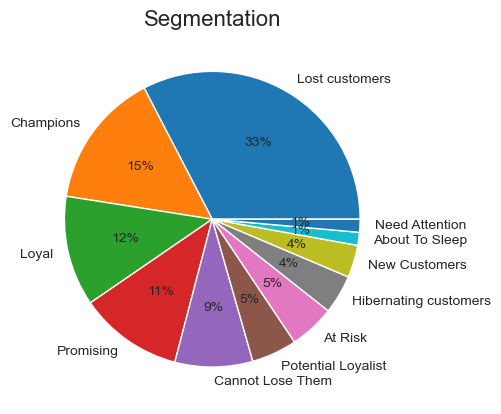

In [362]:
plt.pie(merge.Segment.value_counts(),
        labels=merge.Segment.value_counts().index,
        autopct='%.0f%%')
plt.title('Segmentation', fontsize=16)
plt.show()

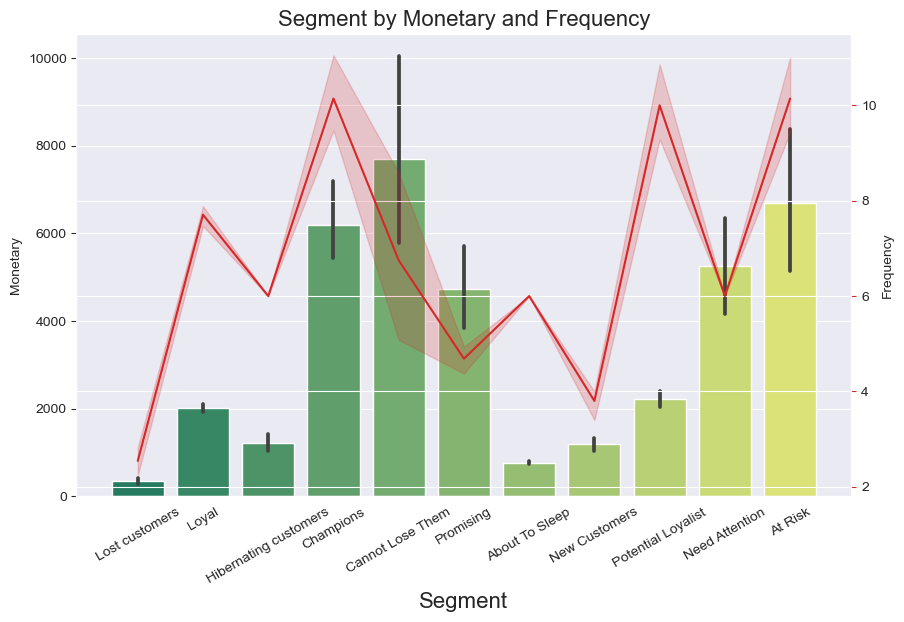

In [363]:
#plt.title('Segment by Monetary')
#sns.barplot(x='Segment', y='Monetary', data=merge, palette='summer')

#plt.title('Segment by Frequency')
#sns.lineplot(x='Segment', y='Frequency', data=merge, sort=False)

fig, ax1 = plt.subplots(figsize=(10,6))
color = 'tab:green'
ax1.set_title('Segment by Monetary and Frequency', fontsize=16)
ax1.set_xlabel('Segment', fontsize=16)

ax2 = sns.barplot(x='Segment', y='Monetary', data = merge, palette='summer')
ax1.tick_params(axis='x', labelsize = 10, rotation = 30)
ax2 = ax1.twinx()
color = 'tab:red'

ax2 = sns.lineplot(x='Segment', y='Frequency', data = merge, sort=False, color=color)
ax2.tick_params(axis='y', color=color, labelsize=10)

plt.show()

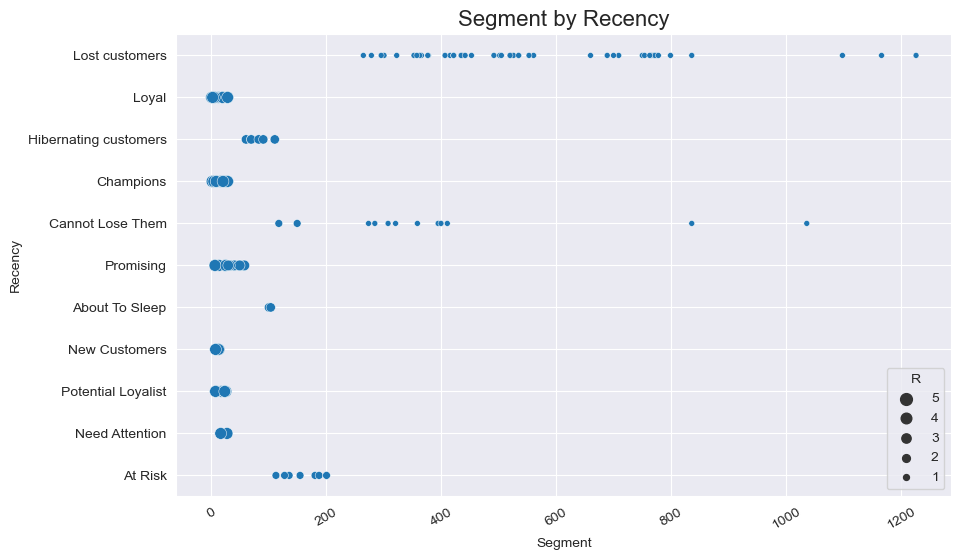

In [364]:
sns.set_style('darkgrid')
fig, ax = plt.subplots(figsize=(10, 6))

sns.scatterplot(x='Recency', y='Segment', size='R', data=merge)
ax.tick_params(axis='x', labelsize = 10, rotation = 30)

plt.title('Segment by Recency', fontsize=16)
plt.xlabel('Segment')
plt.ylabel('Recency')
plt.show()

In [365]:
p = data.merge(product, on = 'Product ID', how = 'left')
p.head()

,Customer ID,Channel,Postal Code,Product ID,Sales,Recency,Frequency,Monetary,RFM_Score,Segment,Row ID,Category,Sub-Category,Product Name
0,CC-12430,Home Office,47201,OFF-AP-10002457,209.300,1,8,2133.180,543,Loyal,554,Office Supplies,Appliances,Eureka The Boss Plus 12-Amp Hard Box Upright V...
1,SV-20935,Consumer,87105,OFF-ST-10003058,118.250,3,8,1903.491,543,Loyal,395,Office Supplies,Storage,Eldon Mobile Mega Data Cart Mega Stackable A...
2,SV-20935,Consumer,87105,OFF-PA-10004239,4.280,3,8,1903.491,543,Loyal,1453,Office Supplies,Paper,Xerox 1953
3,RA-19285,Consumer,10035,FUR-BO-10004015,191.984,6,8,1906.512,543,Loyal,580,Furniture,Bookcases,"Bush Andora Bookcase, Maple/Graphite Gray Finish"
4,SV-20935,Consumer,45014,TEC-AC-10002473,158.928,3,8,1903.491,543,Loyal,727,Technology,Accessories,Maxell 4.7GB DVD-R


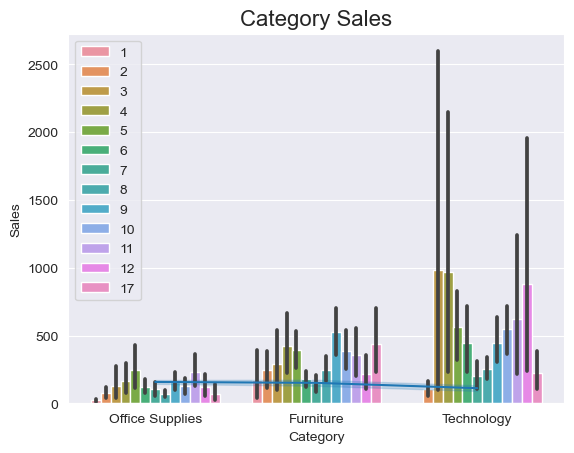

In [379]:
sns.barplot(data = p, x = 'Category', y = 'Sales', hue = 'Frequency')
plt.title('Category Sales', fontsize = 16)

sns.lineplot(x='Category', y='Recency', data=p, sort=False)

plt.show()

In [367]:
c = data.merge(location, on = 'Postal Code', how = 'left')
c.head()

,Customer ID,Channel,Postal Code,Product ID,Sales,Recency,Frequency,Monetary,RFM_Score,Segment,Row ID,Country,City,State,Region
0,CC-12430,Home Office,47201,OFF-AP-10002457,209.300,1,8,2133.180,543,Loyal,135,United States,Columbus,Indiana,Central
1,SV-20935,Consumer,87105,OFF-ST-10003058,118.250,3,8,1903.491,543,Loyal,384,United States,Albuquerque,New Mexico,West
2,SV-20935,Consumer,87105,OFF-PA-10004239,4.280,3,8,1903.491,543,Loyal,384,United States,Albuquerque,New Mexico,West
3,RA-19285,Consumer,10035,FUR-BO-10004015,191.984,6,8,1906.512,543,Loyal,46,United States,New York City,New York,East
4,SV-20935,Consumer,45014,TEC-AC-10002473,158.928,3,8,1903.491,543,Loyal,324,United States,Fairfield,Ohio,East


C:\Users\Phuong Anh\AppData\Local\Temp\ipykernel_19968\3340009647.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), fontsize=10, rotation=45)


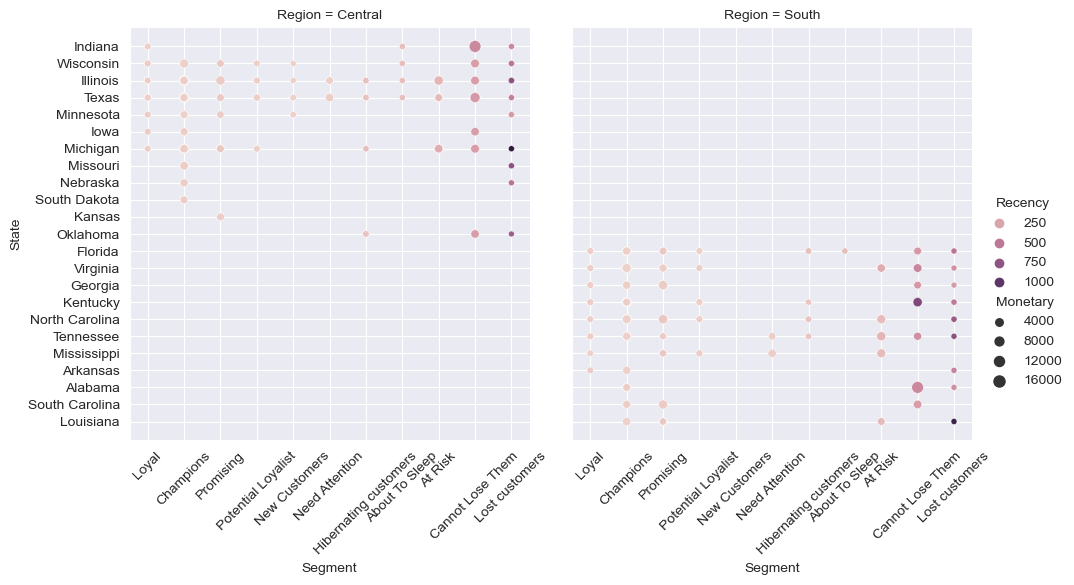

In [368]:
g = sns.relplot(data = c, kind = 'scatter', y = 'State', x = 'Segment', size = 'Monetary',hue = 'Recency', col = 'Region', col_order = ['Central', 'South'])

for ax in g.axes.flat:
    ax.set_xticklabels(ax.get_xticklabels(), fontsize=10, rotation=45)
    
fig.set_size_inches(20, 10)


plt.show()

C:\Users\Phuong Anh\AppData\Local\Temp\ipykernel_19968\1031302842.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), fontsize=10, rotation=45)


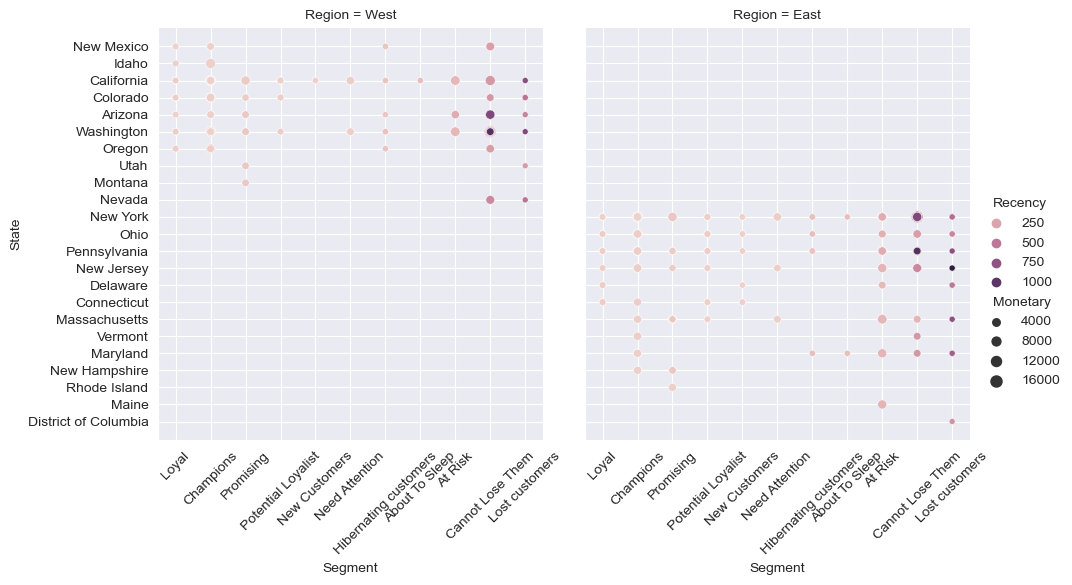

In [369]:
y = sns.relplot(data = c, kind = 'scatter', y = 'State', x = 'Segment', size = 'Monetary', hue = 'Recency', col = 'Region', col_order = ['West', 'East'])

for ax in y.axes.flat:
    ax.set_xticklabels(ax.get_xticklabels(), fontsize=10, rotation=45)
    
fig.set_size_inches(20, 10)

plt.show()
plt.show()

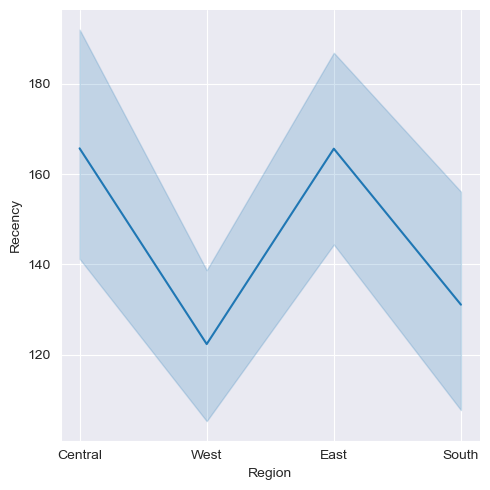

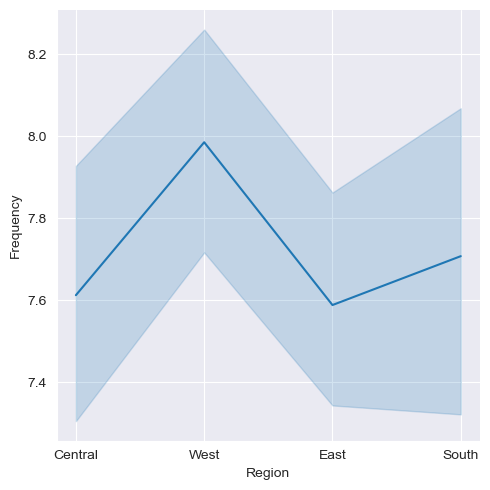

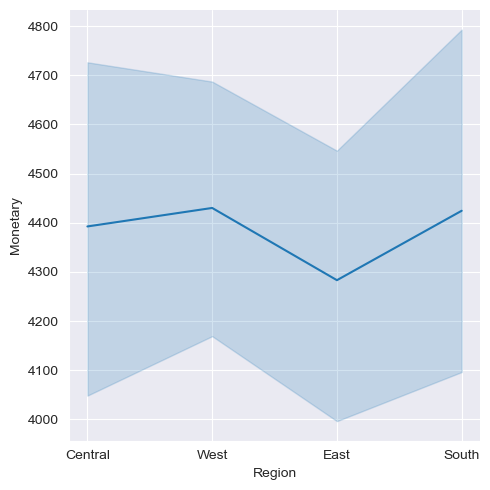

In [374]:
    sns.relplot(kind = 'line', data = c, y = 'Recency', x = 'Region' )
    plt.show()
    
    sns.relplot(kind = 'line', data = c, y = 'Frequency', x = 'Region' )
    plt.show()
    
    sns.relplot(kind = 'line', data = c, y = 'Monetary', x = 'Region' )
    plt.show()

In [371]:
l = data.merge(customer, on = 'Customer ID')
l.head()

,Customer ID,Channel,Postal Code,Product ID,Sales,Recency,Frequency,Monetary,RFM_Score,Segment,Row ID,Customer Name
0,CC-12430,Home Office,47201,OFF-AP-10002457,209.30,1,8,2133.18,543,Loyal,255,Chuck Clark
1,CC-12430,Home Office,55407,OFF-AR-10001216,13.90,1,8,2133.18,543,Loyal,255,Chuck Clark
2,CC-12430,Home Office,55407,OFF-PA-10003127,26.38,1,8,2133.18,543,Loyal,255,Chuck Clark
3,CC-12430,Home Office,10009,FUR-FU-10001934,83.92,1,8,2133.18,543,Loyal,255,Chuck Clark
4,CC-12430,Home Office,10009,OFF-AR-10001130,6.63,1,8,2133.18,543,Loyal,255,Chuck Clark


In [373]:
l = l.drop(['Row ID'], axis=1)
l.head()

,Customer ID,Channel,Postal Code,Product ID,Sales,Recency,Frequency,Monetary,RFM_Score,Segment,Customer Name
0,CC-12430,Home Office,47201,OFF-AP-10002457,209.30,1,8,2133.18,543,Loyal,Chuck Clark
1,CC-12430,Home Office,55407,OFF-AR-10001216,13.90,1,8,2133.18,543,Loyal,Chuck Clark
2,CC-12430,Home Office,55407,OFF-PA-10003127,26.38,1,8,2133.18,543,Loyal,Chuck Clark
3,CC-12430,Home Office,10009,FUR-FU-10001934,83.92,1,8,2133.18,543,Loyal,Chuck Clark
4,CC-12430,Home Office,10009,OFF-AR-10001130,6.63,1,8,2133.18,543,Loyal,Chuck Clark


In [ ]:
Phân tích:
- Công ty đang bị mất nhiều khách hàng (33%), tìm ra nguyên nhân và cải thiện những yếu tố như: ngành hàng, sản phẩm, vị trí… (mấy này phân tích sâu thêm thì mới biết =))) 
- Tập khách hàng cần tri ân và chăm sóc đặc biệt trong chiến dịch này bao gồm Champions (15%), Loyal(12%), Potential List (5%). Nhóm này có tần suất mua hàng nhiều, tỉ lệ truy cập và mua hàng gần đây tương đối cao, Champions đứng thứ 3 về doanh thu đem lại.
- Tập khách hàng cần tập trung khai thác là Promising (11%), New Customers (4%), Need Attention (1%) để họ trở thành tệp khách hàng tiềm năng tiếp theo. Đây là tệp đem lại doanh thu tương đối cao, tần suất mua hàng trung bình,và họ có hoạt động cũng như có đơn hàng gần đây với công ty   
- Tập khách hàng cần luôn luôn lắng nghe, để tìm hiểu sâu thêm tránh họ rời bỏ công ty bao gồm About To Sleep (1%), Hibernating customer (4%), At Risk (5%). Nhóm này đem lại khá nhiều doanh thu, tần suất mua hàng khá cao. Nhưng lại không mua hàng gần đây nhiều.
- Cannot Lose Them chiếm (9%), là tập khách hàng đang đem lại nhiều doanh thu nhất nhưng tỉ lệ mua hàng gần đây không cao, cần có chiến dịch quảng cáo phù hợp để công ty không mất khách hàng mãi mãi
- Technology là ngành hàng đem lại nhiều doanh thu nhất, nhưng tỉ lệ mua hàng gần đây (R) lại thấp nhất. Trong khi đó Office Supplies đem lại ít doanh thu nhất, nhưng lại có nhiều khách hàng mua hàng gần đây.
- Khu vực phía Tây (West) đem lại nguồn doanh thu lớn nhất, tần suất mua hàng cao nhất, nhưng tỉ lệ mua hàng gần đây lại tụt xuống vị trí cuối cùng. Cần có điều chỉnh về chính sách bán hàng tại khu vực này.
- Ở Central và East có tỉ lệ mua gần đây cao. Khai thác để biết thêm nhu cầu các nhóm khách hàng ở đây.


- Cả 3 chỉ số R,F,M đều quan trọng, vì vậy mới tạo nên mô hình RFM. Tuy nhiên, xét về góc độ Marketing & Sales thì chỉ số Recency là quan trọng nhất và nên quan tâm vào chỉ số này.
Vì mỗi 1 giai đoạn sẽ có chiến dịch, chiến lược Marketing tiếp cận khách hàng khác nhau. 
Nên những khách hàng có đơn mua hàng gần đây là những người đang có xu hướng quan tâm đến sản phẩm, thương hiệu... Họ có mức độ gắn kết với thương hiệu, công ty nhiều hơn, và có thể sẽ là khách hàng trung thành trong tương lai.